In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/tmp69_f42cx.c:1:1: error: unknown type name ‘from’
 from IPython.core.display import display, HTML
 ^~~~
/tmp/tmp69_f42cx.c:1:13: error: expected ‘=’, ‘,’, ‘;’, ‘asm’ or ‘__attribute__’ before ‘.’ token
 from IPython.core.display import display, HTML
             ^
[C kernel] GCC exited with code 1, the executable will not be executed

## Practice Exercises Ch.1
1.1, 1.2, 1.5 to 1.9



1.1 Three main purposes of OS:

1.  Resource allocation, decides between conflicting requests for efficient and fair resource use.  What is fair?  Are we not looking to optimize by max efficiency and max usage?

2.  Act as a control program, controls execution of programs to prevent errors and improper use of computer by having privleged kernel mode and requiring user apps to make system calls.  

3.  Provide environment for user to execute programs with ease and efficiency

1.2 GUI is a waste of cycles but ok since the user experience is enhanced.

1.5 kernel mode protects hardware by allowing access only when program running in kernel mode (after system call).  Kernel mode also controls when interrupts are enabled or disabled.  

##  see the other PDF file


## Ch.2 Practice

# 2.1, 2.3 to 2.11

2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
What is the purpose of system calls? <br>
What is the purpose of the command interpreter? Why is it usually
separate from the kernel? <br>
What system calls have to be executed by a command interpreter or shell
in order to start a new process on a UNIX system? <br>
What is the purpose of system programs? <br>
What is the main advantage of the layered approach to system design? <br>
What are the disadvantages of the layered approach? <br>
List five services provided by an operating system, and explain how each
creates convenience for users. In which cases would it be impossible for
user-level programs to provide these services? Explain your answer. <br>
Why do some systems store the operating system in firmware, while
others store it on disk? <br>
How could a system be designed to allow a choice of operating systems
from which to boot? What would the bootstrap program need to do?


2.1  System calls are how the kernel provides services, ie. access to hardware, to user programs.  User programs implement APIs to make calls.

2.3  A new process requires a fork() to duplicate a process, then exec() to clear the address space and load a program into it.  The parent can wait() while the child executes and exit().

2.4  System programs are like a layer between the apps and OS providing many services for:
### file management 
(create, delete, copy, rename, print. list and access/manipulate files and directories),
### file modification
text editors to create, edit file contents on disk, special commands to search contents of files or transform text.
### programming language support
compilers, assemblers, debuggers, interpreters
### program loading and execution
load program into memory via loaders, linkage editors (libraries and modules or files like .h in C or C++), debugging systems.
### communications 
create virutal connections among processes, users, systems to pass messages, browse web, send email, remote login, transfer files 
### background services
launched at boot time, some of these keep running and are called daemons, services, subsystems.  Ie. network daemon listens for connections to connect to processes.  Process scheduler, system error monitoring, print servers.  Typcically have dozens of daemons, important activites run in user mode use dameons.  


## 2.5 command interpreter or CLI command line interface
shells implemented in kernel or systems programs allowing direct entry of commands.  built-in commands or run programs, shell scripts.  
It is not a part of the kernel since new features can be added like tmux shell, modify the prompt, etc.
Commands are usually turned into system calls like printf() -> write()


### 2.6 system calls by CLI for new process
fork() creates a child copy of process (clones) and then exec() clears address space of child and replaces it with the program.  pid of child returned to parent and child receives a 0 or 1.   

### 2.5 layered design
each layer only needs to interact with the layer above and below it providing an API for layer above and accessing service from layer below.  It's modular so it's easier to debug and modify since changes affect only certain parts and not the whole system.  Data is kept only where needed and accessible only within defined and restricted area.  
### disdavantages
defining various layers is difficult.  
less efficient than other implementations.



## 5 services of OS
### 1. file system manipulation
read, write, create, delete, search, list file info, permission management
user access to file system could lead to file corruption, defragmentation and unnecessary complexity in choosing disk space for storage
### 2. communications
shared memory or message passing (packets moved by OS)
user processes would have to coordinate with each other not to double use memory space.  
user processes trying to connect to distant processes via network may have problems finding the right mailbox since PIDs change for most user applications and user applications would have to implement the API to make and drop connections and block send/receive where as the OS has system calls to handle these routines.   
### 3. error detection
OS takes action to ensure correct and consistent computing
user program can used debugging programs to ensure efficient and proper use of the system, ie. avoid memory leaks but with concurrency the OS needs to allocate resources such as memory to prevent writing over address spaces of other processes.
### 4.  resource allocation
multiple user or jobs:  allocate CPU cycles, main memory, file storage, I/O devices
every user app would need to know what other apps are running in order to limit its own usage of resources, priority levels and know how to handle interrupts and have replacements for system calls to ensure that resources are not corrupted and multitasking, multiprogramming is handled properly to provide a seamless user experience.  
### 5. protection and security
privileged access to data.  concurrent access to data needs to be synchronized.  
protect all resources from unauthorized access via user authentication including external IO devices.
Again user programs would have to communicate with every other process competing for resources and keep a Process Control Block containing info of each process for every other process which degrades efficiency.
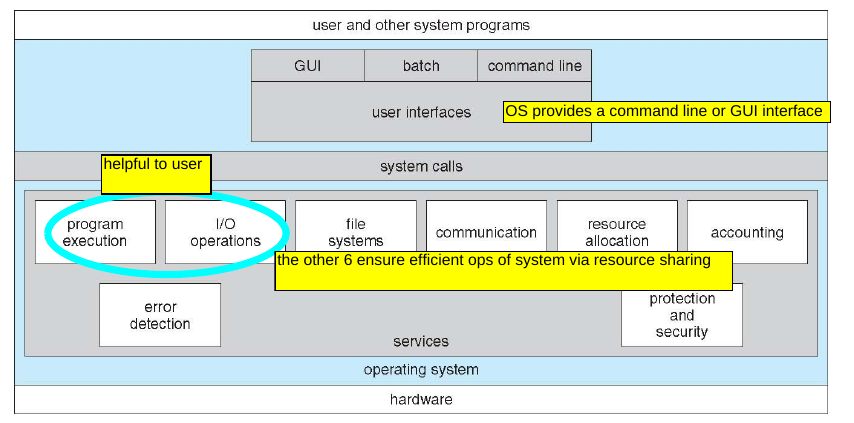




## Firmware vs. disk for storing OS
firmware is set of instructions on the read only ROM that loads the kernel (on disk) at boot time via the boostrap program (which is on disk so is software) locating it, kernel initializes hardware and mounts the root file system.  OS is usually on SSD or hard drive that is then loaded. 
BIOS (basic input output system) is firmware that provides runtime services for operation systems and programs preinstalled on system board and is the first to run.  


### Choosing OS, what does bootstrap need to do?
BIOS runs a power-on self test (POST) checks hardware then checks the MBR master boot record, first 512 bytes on hard drive and finds a bootloader like GRUB next to hard drive partition table.  GRUB menu is where user chooses which kernel to load, kernel start init() or systemd() which starts other processes.
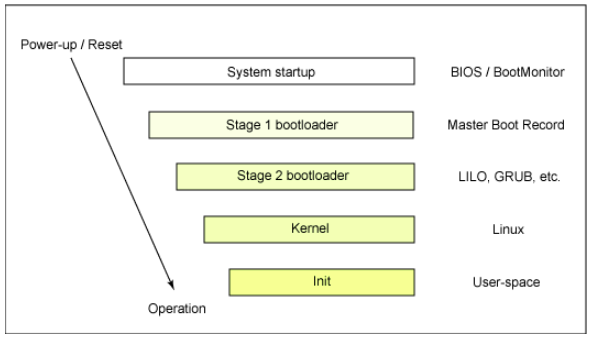